In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Python prac\Jupyter Programs\Untitled Folder\ML Projects\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [17]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [18]:
df.drop_duplicates(inplace= True)

In [65]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [47]:
cross_resu = pd.crosstab(index = df['region'] ,columns= [df['sex'],df['smoker']],margins=True,margins_name='total')
cross_resu

sex       female      male      total
smoker        no  yes   no  yes      
region                               
northeast    132   29  125   38   324
northwest    135   29  131   29   324
southeast    139   36  134   55   364
southwest    141   21  126   37   325
total        547  115  516  159  1337

In [50]:
cross_res2 = pd.crosstab(index = df['region'] ,columns= [df['sex'],df['smoker']])
cross_res2

sex       female     male    
smoker        no yes   no yes
region                       
northeast    132  29  125  38
northwest    135  29  131  29
southeast    139  36  134  55
southwest    141  21  126  37

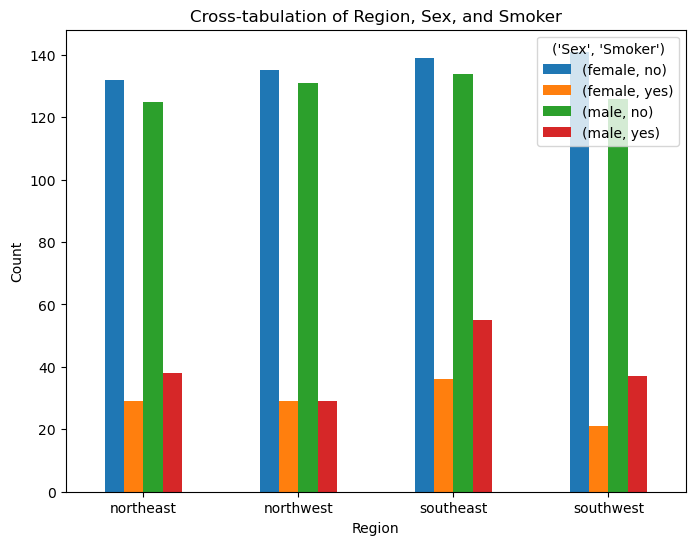

In [52]:
cross_res2.plot(kind='bar', figsize=(8, 6))
plt.title('Cross-tabulation of Region, Sex, and Smoker')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title=('Sex', 'Smoker'))
plt.show()

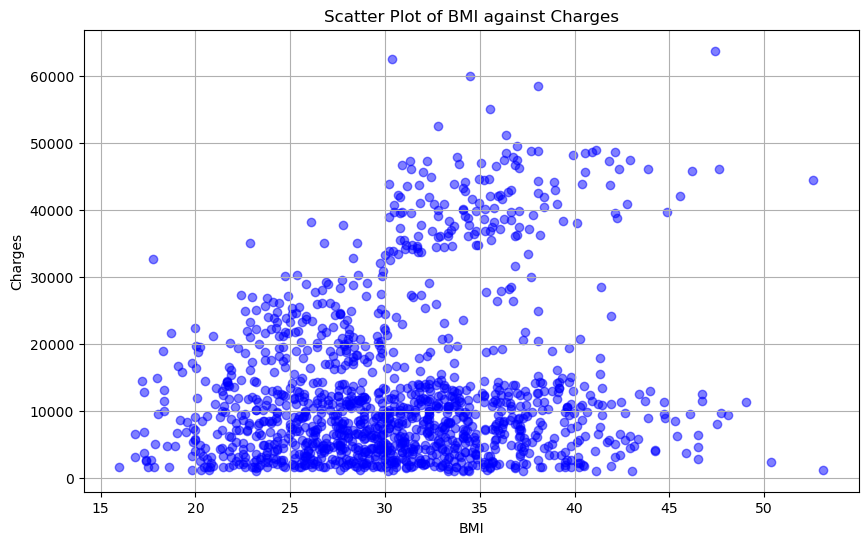

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(df['bmi'], df['charges'], alpha=0.5, color='blue')
plt.title('Scatter Plot of BMI against Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

# with this scatterplot we can say that as BMI is increasing Charges also increasing 

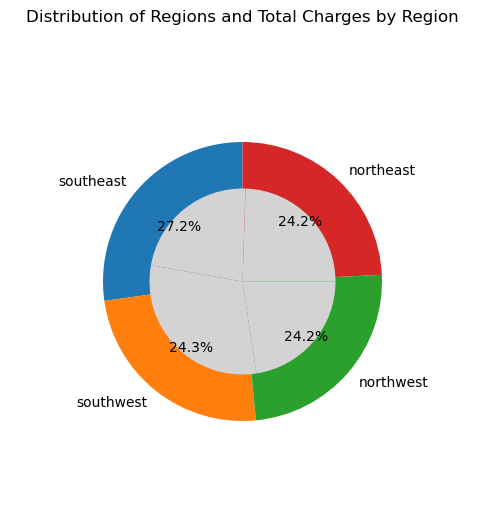

In [34]:
region_counts = df['region'].value_counts()
charges_by_region = df.groupby('region')['charges'].sum()

fig, ax = plt.subplots(figsize=(6, 8))
ax.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, radius=0.75)
ax.pie(charges_by_region, labels=[''] * len(charges_by_region), radius=0.5, colors=['lightgray'])
ax.set_title('Distribution of Regions and Total Charges by Region', pad=20)
plt.show()

In [35]:
df.groupby('region')['charges'].sum()

region
northeast    4.343669e+06
northwest    4.034072e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64

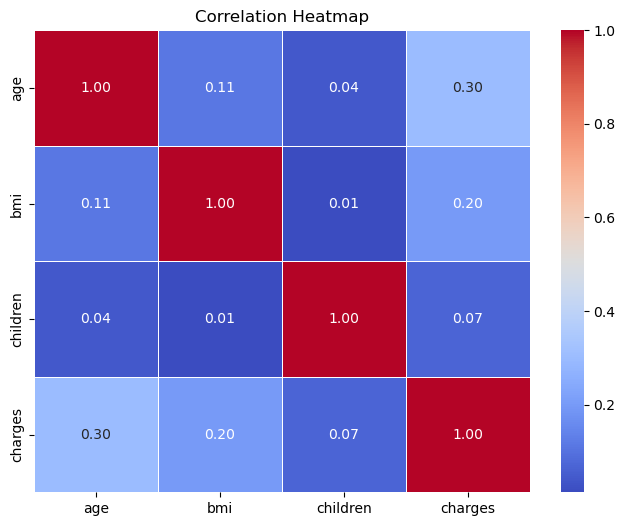

In [73]:
numeric_df = df.drop(columns=['sex', 'smoker', 'region'])

corr = numeric_df.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#  Identify the input and output/target variables. - Identify the type of ML Task. - Identify the Evaluation Metric. - For regression task - Mean Absolute Error - For classification task - Accuracy

In [75]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
x= df.drop(columns=['charges'],axis=1)
y = df['charges']

In [89]:
print(x.shape,y.shape)

(1337, 6) (1337,)


In [83]:
from sklearn.model_selection import train_test_split as split

In [90]:
x_train,x_test,y_train,y_test = split(x,y, train_size= 0.75, random_state = 45)

In [91]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1002, 6) (1002,)
(335, 6) (335,)


In [92]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002 entries, 250 to 972
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1002 non-null   int64  
 1   sex       1002 non-null   object 
 2   bmi       1002 non-null   float64
 3   children  1002 non-null   int64  
 4   smoker    1002 non-null   object 
 5   region    1002 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 54.8+ KB


In [95]:
x_train_num = x_train.select_dtypes(include=['Int64','float64'])
x_train_num.head()

,age,bmi,children
250,18,17.290,2
4,32,28.880,0
370,61,21.090,0
1034,61,38.380,0
1192,58,32.395,1


In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()

In [101]:
x_train_num_transform = pd.DataFrame(scaler.fit_transform(x_train_num),
                                     columns = x_train_num.columns,
                                     index = x_train_num.index)
x_train_num_transform.head()

,age,bmi,children
250,-1.500346,-2.205520,0.745208
4,-0.502486,-0.294964,-0.917817
370,1.564508,-1.579108,-0.917817
1034,1.564508,1.271065,-0.917817
1192,1.350681,0.284466,-0.086305


In [102]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [39.0499002  30.66934132  1.10379242]
Std of each column: [14.03003283  6.06629855  1.20262752]


# Applying OneHotEncoding on Categorical Columns

In [104]:
from sklearn.preprocessing import OneHotEncoder

In [107]:
x_train_cat = x_train.select_dtypes(include= ['object'])
x_train_cat.head()

,sex,smoker,region
250,male,yes,northeast
4,male,no,northwest
370,female,no,northwest
1034,male,no,northwest
1192,female,no,northeast


In [112]:
ohe = OneHotEncoder(drop='first',sparse_output=False)
ohe

OneHotEncoder(drop='first', sparse_output=False)

In [119]:
x_train_cat_ohe = pd.DataFrame(ohe.fit_transform(x_train_cat),
                               columns = ohe.get_feature_names_out(),
                               index = x_train_cat.index)
x_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
250,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
370,0.0,0.0,1.0,0.0,0.0
1034,1.0,0.0,1.0,0.0,0.0
1192,0.0,0.0,0.0,0.0,0.0


In [122]:
x_train_transformed = pd.concat([x_train_num_transform,x_train_cat_ohe],axis = 1)
x_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
250,-1.500346,-2.205520,0.745208,1.0,1.0,0.0,0.0,0.0
4,-0.502486,-0.294964,-0.917817,1.0,0.0,1.0,0.0,0.0
370,1.564508,-1.579108,-0.917817,0.0,0.0,1.0,0.0,0.0
1034,1.564508,1.271065,-0.917817,1.0,0.0,1.0,0.0,0.0
1192,1.350681,0.284466,-0.086305,0.0,0.0,0.0,0.0,0.0


 # Applying on X_test

In [123]:
x_test.head()

,age,sex,bmi,children,smoker,region
989,24,female,20.520,0,yes,northeast
799,33,male,24.795,0,yes,northeast
145,29,female,38.830,3,no,southeast
382,55,male,33.000,0,no,southeast
681,19,male,20.300,0,no,southwest


In [127]:
x_test_num = x_test.select_dtypes(['Int64','float64'])
x_test_num.head()

,age,bmi,children
989,24,20.520,0
799,33,24.795,0
145,29,38.830,3
382,55,33.000,0
681,19,20.300,0


In [130]:
x_test_num_transformed = pd.DataFrame(scaler.transform(x_test_num),
                                      columns= x_test_num.columns,
                                      index = x_test_num.index)
x_test_num_transformed.head()

,age,bmi,children
989,-1.072692,-1.673070,-0.917817
799,-0.431211,-0.968357,-0.917817
145,-0.716313,1.345245,1.576721
382,1.136854,0.384198,-0.917817
681,-1.429070,-1.709336,-0.917817


In [131]:
x_test_num_transformed.describe(include='all')

,age,bmi,children
count,335.000000,335.000000,335.000000
mean,0.048996,-0.003875,-0.026734
std,1.003172,1.022339,1.009490
min,-1.500346,-2.424764,-0.917817
25%,-0.930140,-0.741283,-0.917817
50%,0.067719,-0.075720,-0.086305
75%,0.923027,0.646302,0.745208
max,1.778335,3.249207,3.239746


In [133]:
x_test_cat = x_test.select_dtypes(['object'])
x_test_cat.head()

,sex,smoker,region
989,female,yes,northeast
799,male,yes,northeast
145,female,no,southeast
382,male,no,southeast
681,male,no,southwest


In [136]:
x_test_cat_ohe = pd.DataFrame(ohe.transform(x_test_cat),
                              columns = ohe.get_feature_names_out(),
                              index = x_test_cat.index)
x_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
989,0.0,1.0,0.0,0.0,0.0
799,1.0,1.0,0.0,0.0,0.0
145,0.0,0.0,0.0,1.0,0.0
382,1.0,0.0,0.0,1.0,0.0
681,1.0,0.0,0.0,0.0,1.0


In [138]:
x_test_transformed = pd.concat([x_test_num_transformed,x_test_cat_ohe],axis = 1)
x_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
989,-1.072692,-1.673070,-0.917817,0.0,1.0,0.0,0.0,0.0
799,-0.431211,-0.968357,-0.917817,1.0,1.0,0.0,0.0,0.0
145,-0.716313,1.345245,1.576721,0.0,0.0,0.0,1.0,0.0
382,1.136854,0.384198,-0.917817,1.0,0.0,0.0,1.0,0.0
681,-1.429070,-1.709336,-0.917817,1.0,0.0,0.0,0.0,1.0


In [139]:
print(x_test_transformed.shape,x_train_transformed.shape)

(335, 8) (1002, 8)


# Importing sklearn models

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [141]:
lr = LinearRegression()

In [142]:
lr.fit(x_train_transformed,y_train)

LinearRegression()

In [151]:
y_test_predicted = lr.predict(x_test_transformed)

# Evaluation Metric

In [143]:
from sklearn import metrics 

In [152]:
mae_lr = metrics.mean_absolute_error(y_test_predicted,y_test)
print('Mean Absolute Error: ', mae_lr)
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_predicted))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

Mean Absolute Error:  4114.793967346031
Mean Squared Error:  32910400.142561678
Root Mean Squared Error:  5736.75867912898


In [160]:
models = [LinearRegression(),
             KNeighborsRegressor(),
             DecisionTreeRegressor(),
             RandomForestRegressor(n_estimators=200),
             SVR(),
             GradientBoostingRegressor()]

score_card = pd.DataFrame(columns = ["Algorithms","MAE","MSE","RMSE"])
resulta=[]
resultb=[]
resultc=[]
model=[]

for i in models:
    model_no = str(i)
    model.append(model_no)
    
    j=i
    
    j.fit(x_train_transformed,y_train)
    
    y_test_predicted=j.predict(x_test_transformed)
    
    mae = mean_absolute_error(y_test,y_test_predicted)
    resulta.append(mae)
    
    mse = metrics.mean_squared_error(y_test, y_test_predicted)
    resultb.append(mse)
    
    rmse = metrics.mean_squared_error(y_test, y_test_predicted)
    resultc.append(rmse)
    
    
    
score_card["Algorithms"]=model
score_card["MAE"]=resulta
score_card["MSE"]=resultb
score_card["RMSE"]=resultc

In [162]:
score_card

,Algorithms,MAE,MSE,RMSE
0,LinearRegression(),4114.793967,3.291040e+07,3.291040e+07
1,KNeighborsRegressor(),3804.180506,4.217194e+07,4.217194e+07
2,DecisionTreeRegressor(),3389.073417,4.689847e+07,4.689847e+07
3,RandomForestRegressor(n_estimators=200),2736.862117,1.935867e+07,1.935867e+07
4,SVR(),7629.502099,1.342362e+08,1.342362e+08
5,GradientBoostingRegressor(),2352.802176,1.627753e+07,1.627753e+07
